## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [ ]:
# Liav Mordouch 3327
# Omer Kafe 0647
# Roi Cohen 2154
# student 4:
# (optional) student 5:
# (optional) student 6:

## Part 2 - Experiments
You could add as many code cells as needed

In [17]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load the datasets
train_data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_test.csv')

# Display the first 5 rows of each dataset
print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

Train Data:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

Test Data:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


#### Pclass:

In [18]:
pclass_counts = train_data.Pclass.value_counts()
print(pclass_counts)

3    388
1    178
2    146
Name: Pclass, dtype: int64


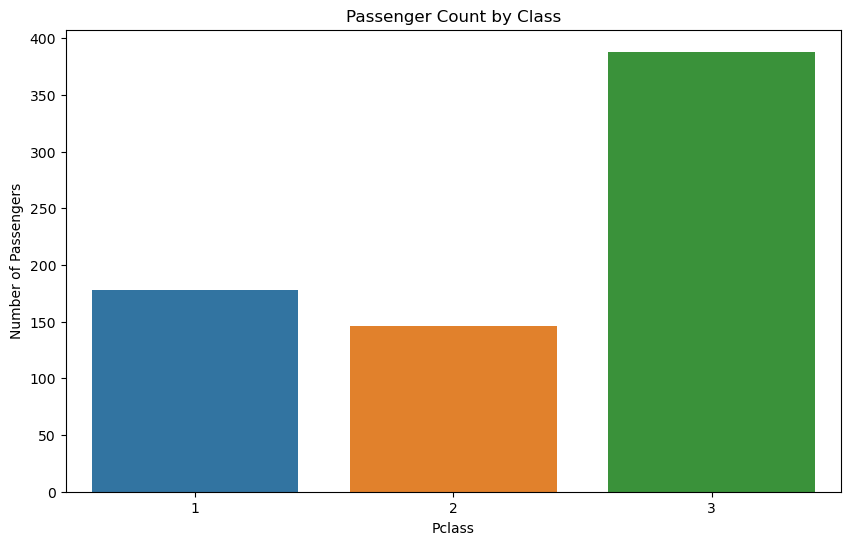

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=train_data)
plt.title('Passenger Count by Class')
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')
plt.show()

In [24]:
survival_rates_Pclass = train_data.groupby('Pclass')['Survived'].mean()
print(survival_rates_Pclass)

Pclass
1    0.634831
2    0.458904
3    0.260309
Name: Survived, dtype: float64


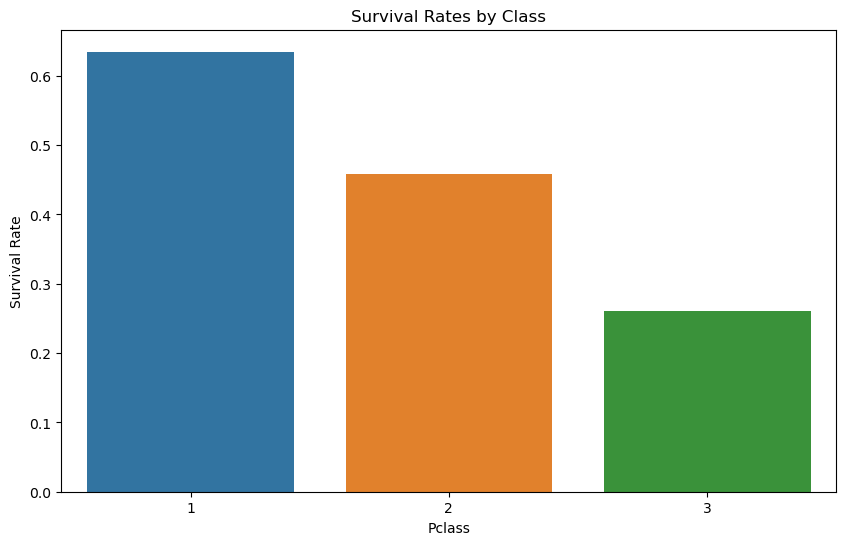

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_rates_Pclass.index, y=survival_rates_Pclass.values)
plt.title('Survival Rates by Class')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

## Analysis of the `Pclass` Feature

The data shשows three different classes of passengers on the Titanic, which are:

- **First Class (Pclass 1):** This class had the highest survival rate at about 64%. It had 178 passengers. This suggests that first class passengers had better chances of survival, possibly due to better access to lifeboats.

- **Second Class (Pclass 2):** The survival rate for the second class was lower, at around 46%. There were 146 passengers in this class. They had lesser survival chances compared to first class but were still better off than third class.

- **Third Class (Pclass 3):** This was the largest group with 388 passengers, but it had the lowest survival rate at about 26%. The low survival rate indicates that third class passengers had the least access to life-saving facilities.

- **The graphs provide:**
- The first graph shows more third class passengers than first or second class.
- The second graph illustrates the survival rates, highlighting that first class passengers had the highest survival rate, showing a clear difference in survival chances based on class.

This analysis shows that there was a strong link between a passenger's class and their chances of survival, likely due to differences in access to emergency resources.

#### Sex

In [22]:
Sex_counts = train_data.Sex.value_counts()
print(Sex_counts)

1    456
0    256
Name: Sex, dtype: int64


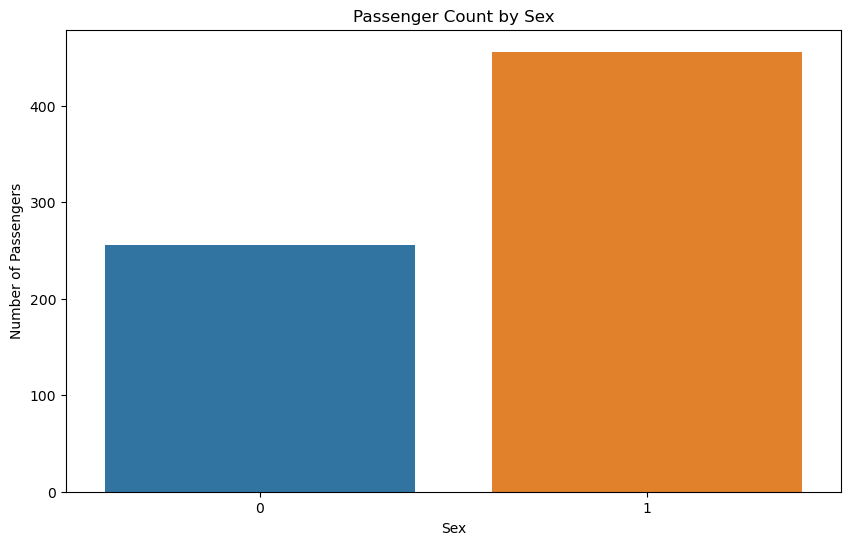

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=train_data)
plt.title('Passenger Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.show()

In [25]:
survival_rates_Sex = train_data.groupby('Sex')['Survived'].mean()
print(survival_rates_Sex)

Sex
0    0.753906
1    0.192982
Name: Survived, dtype: float64


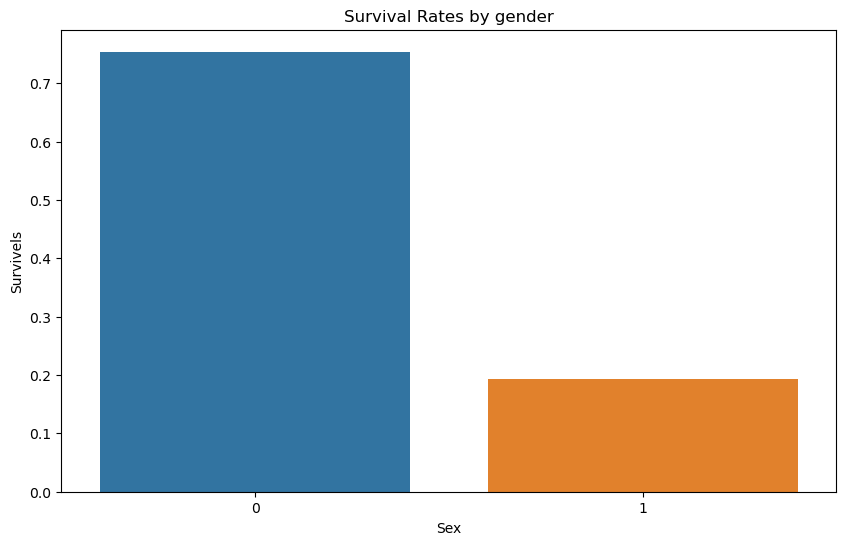

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_rates_Sex.index, y=survival_rates_Sex.values)
plt.title('Survival Rates by gender')
plt.xlabel('Sex')
plt.ylabel('Survivels')
plt.show()

In [29]:
# Display basic statistics of the datasets
print("Train Data Statistics:")
print(train_data.describe())

print("\nTest Data Statistics:")
print(test_data.describe())


Train Data Statistics:
           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.

In [4]:
#information of the columns
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    179 non-null    int64  
 1   Sex       179 non-null    int64  
 2   Age       179 non-null    float64
 3   SibSp     179 non-null    int64  
 4   Parch     179 non-null    int64  
 5   Fare      179 non-null    float64
 6   Embarked  179 non-null    int64  


- we can see that there are not missing values. 
712 non-nulls in each of the columns on the train data.
179 non-nulls in each of the columns on the test data. 

In [8]:
train_data.Survived.value_counts()
survived_count = train_data.Survived.sum()
total_passengers = train_data.Survived.count()
survival_rate = (survived_count / total_passengers) * 100
print(f"Percentage of survivors: {survival_rate:.2f}%")

Percentage of survivors: 39.47%


In [9]:
mean_age = train_data['Age'].mean()
print(f"Mean age: {mean_age:.2f}")

Mean age: 29.53


In [10]:
mean_fare = train_data['Fare'].mean()
print(f"Mean fare: {mean_fare:.2f}")

Mean fare: 32.38


In [11]:
print(train_data['Sex'].value_counts())

1    456
0    256
Name: Sex, dtype: int64


#### Insights from Data Statistics:
- The train data includes 712 samples.
- The average age of the passengers is 29.53.
- The average fare is 32.38.
- The 'Survived' field shows that 39.47% of the passengers survived.


#### Insights from Age and Fare Distribution:
- The average age of passengers is between 20-40 years, with a wider spread among younger ages.
- Most tickets were sold for fares below 100, with a small number of tickets sold for significantly higher prices.


#### Insights from Pclass vs. Survived:
- Passengers in the 3rd class had a lower survival rate compared to those in the 1st and 2nd classes.
- There is a noticeable difference in survival rates between the classes, with 1st class passengers having the highest survival rate.


## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

## Part 4 - Apply on test and show model performance estimation